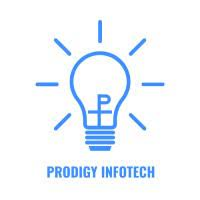

# Data Science Internship

# - PRAJWAL SINGH R


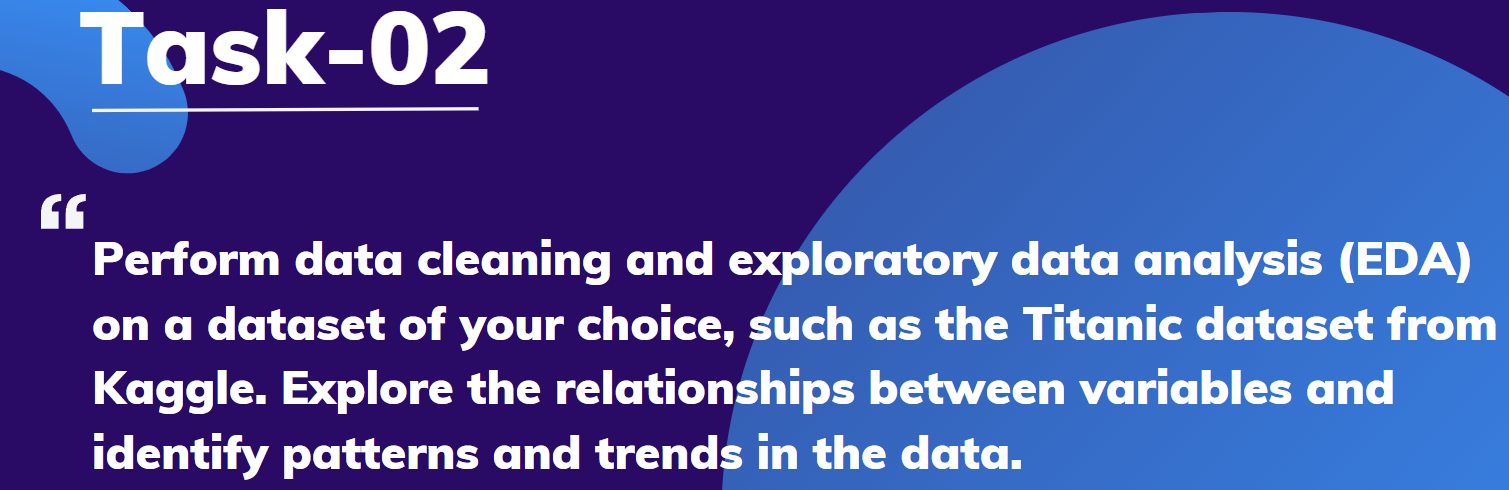

### TITANIC EXPLORATORY DATA ANALYSIS

**Objective:** To clean and explore the Titanic dataset, investigating relationships between variables, and uncovering patterns and trends to gain insights into factors influencing passenger survival on the Titanic.



### DATA UNDERSTANDING

The datasets is obtained from Kaggle: [Titanic](https://www.kaggle.com/c/titanic/data)   
 
The dataset contains 891 rows (entries) and 12 columns    
The columns are:       

``PassengerId``: Unique identifier for each passenger.    
``Survived``: Binary variable indicating survival (1 = Survived, 0 = Did Not Survive).    
``Pclass``: Ticket class (1st, 2nd, 3rd class).     
``Name``: Passenger's name.    
``Sex``: Gender of the passenger.      
``Age``: Age of the passenger.     
``SibSp``: Number of siblings/spouses aboard.     
``Parch``: Number of parents/children aboard.     
``Ticket``: Ticket number.    
``Fare``: Passenger fare.    
``Cabin``: Cabin number.        
``Embarked``: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)       


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy import stats

In [12]:
class DataUnderstanding:
    def __init__(self,df):
        self.df = df

    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats
    
    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values
    
    def get_info(self):
        info = self.df.info()
        return info
    
    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes
    
    def get_value_counts(self):
        value_counts = {} # Initialize an empty dictionary to store the results
        for column in self.df.columns:
            value_counts[column] = self.df[column].value_counts()
        return value_counts

In [13]:
#Preview the dataset
df = pd.read_csv('D:/Prodigy/Task 2/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
#Initialising the DataUnderstanding class
du = DataUnderstanding(df)

In [15]:
# Getting the summary statistics
summary_stats = du.get_summary_statistics()
print("Summary Statistics: ")
summary_stats

Summary Statistics: 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# get summary of the data
du.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
# get data types
du.get_dtypes()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
# Those who survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## DATA PREPARATION

##### Check for missing values

In [19]:
# Check for missing values
du.get_missing_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Dealing with missing values

Since the column named 'Cabin' contains more than 50% of missing values, I choose to drop off that particular column.

In [20]:
# Drop the cabin column
df = df.drop('Cabin', axis=1)

For the 'embarked' column, We can impute missing values with the most frequent port

In [21]:
# finding the most frequent port (mode) in the embarked column
most_frequent_port = df['Embarked'].mode()[0]
print(most_frequent_port)

# Filling missing values with the most frequent values in the embarked column
df['Embarked'].fillna(most_frequent_port, inplace=True)

S


In [22]:
# Removing rows with missing ages
df.dropna(subset=['Age'], inplace=True)

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


##### Value counts

In [24]:
# get value counts
du.get_value_counts()

{'PassengerId': 1      1
 599    1
 588    1
 589    1
 590    1
       ..
 301    1
 302    1
 303    1
 304    1
 891    1
 Name: PassengerId, Length: 891, dtype: int64,
 'Survived': 0    549
 1    342
 Name: Survived, dtype: int64,
 'Pclass': 3    491
 1    216
 2    184
 Name: Pclass, dtype: int64,
 'Name': Braund, Mr. Owen Harris                     1
 Boulos, Mr. Hanna                           1
 Frolicher-Stehli, Mr. Maxmillian            1
 Gilinski, Mr. Eliezer                       1
 Murdlin, Mr. Joseph                         1
                                            ..
 Kelly, Miss. Anna Katherine "Annie Kate"    1
 McCoy, Mr. Bernard                          1
 Johnson, Mr. William Cahoone Jr             1
 Keane, Miss. Nora A                         1
 Dooley, Mr. Patrick                         1
 Name: Name, Length: 891, dtype: int64,
 'Sex': male      577
 female    314
 Name: Sex, dtype: int64,
 'Age': 24.00    30
 22.00    27
 18.00    26
 19.00    25
 28.00   

 #### Checking for duplicates
 

passengerID is used here since it is a unique identifier

In [25]:
# Convert 'PassengerId' column to int64
df['PassengerId'] = df['PassengerId'].astype('int64')


In [26]:
# checking for duplicates
df.duplicated(subset='PassengerId').sum()

0

 #### Checking for outliers and removing them
 

In [27]:
numerical_columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

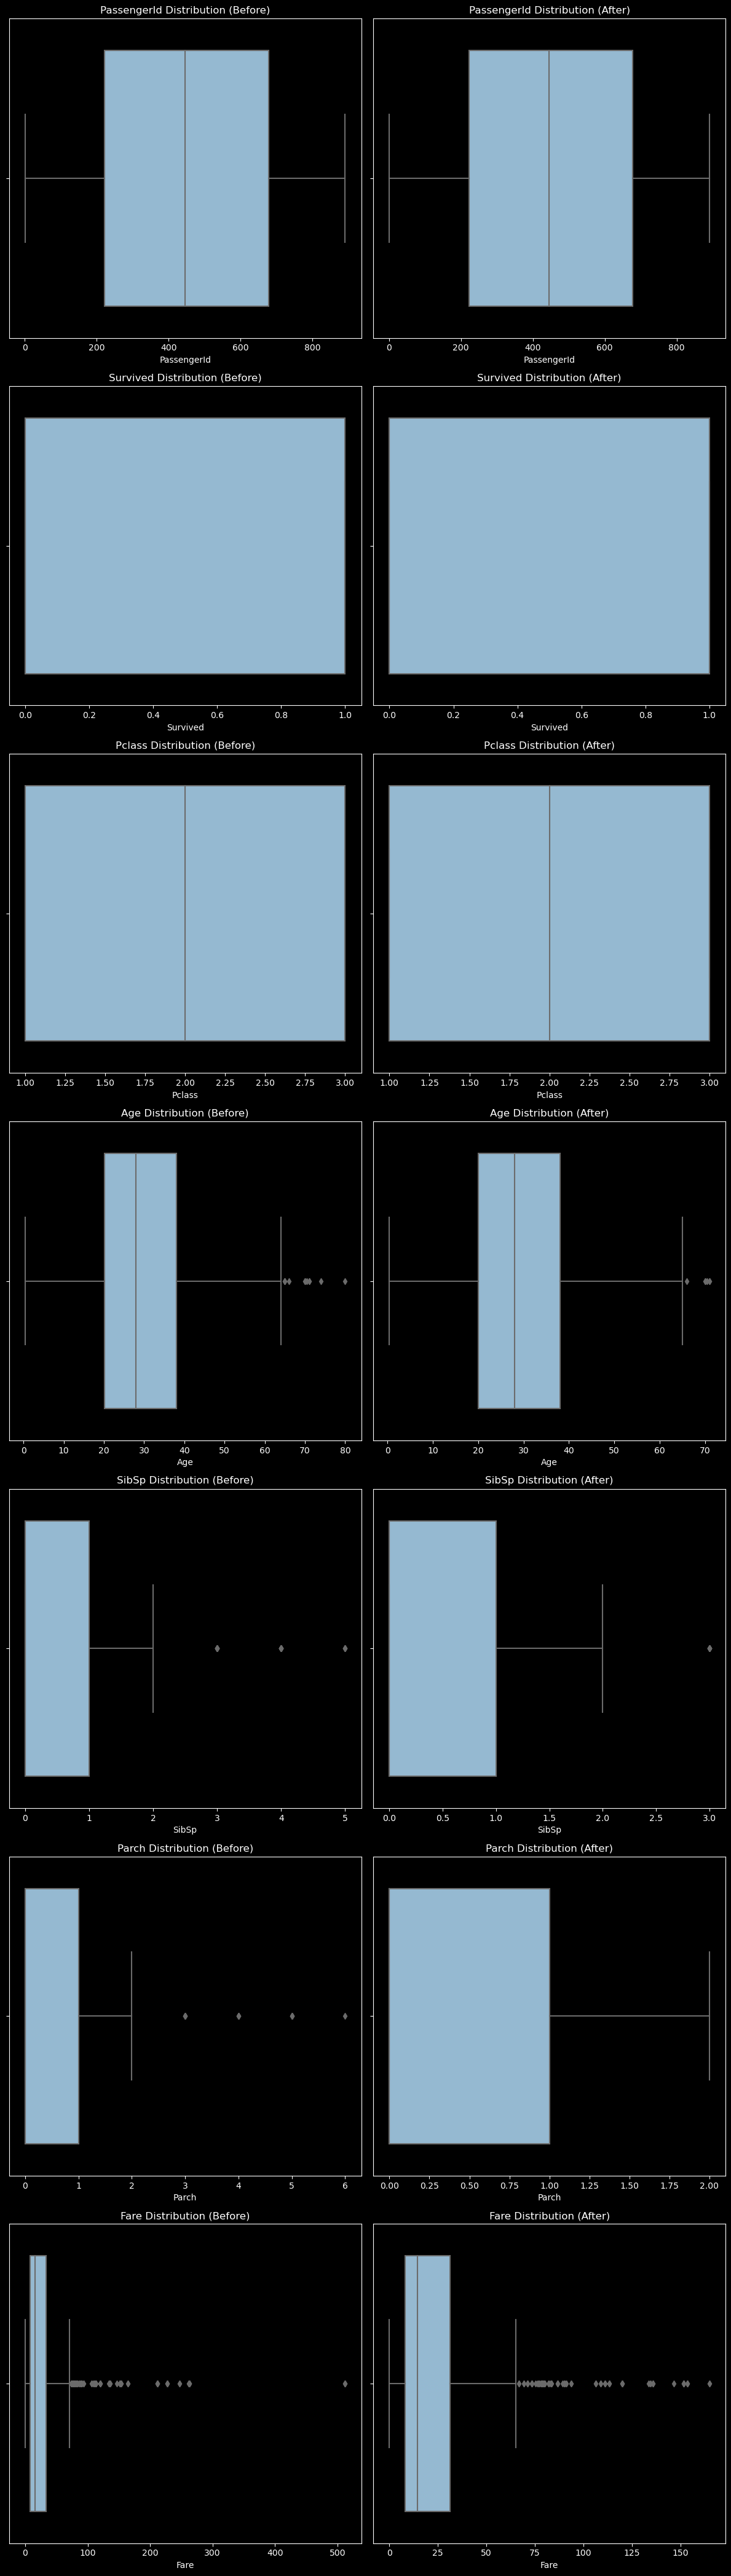

In [28]:
# Setting the plot style to a dark theme
plt.style.use('dark_background')
# Define a custom color palette with darker shades of blue
custom_palette = sns.color_palette("Blues_d")
sns.set_palette(custom_palette)
# Function to check for outliers by plotting
def outlier_plot_box(df, column_name, ax=None):
    sns.boxplot(x=df[column_name], ax=ax)

# Function to remove outliers
def remove_outliers(data, cols, threshold=3):
    for col in cols:
        z_scores = np.abs(stats.zscore(data[col]))
        data = data[(z_scores < threshold)]
    return data

# Function to plot outliers before and after removal
def plot_outliers_before_and_after(df, numerical_columns, threshold=3):
    fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, len(numerical_columns) * 6))

    for i, column in enumerate(numerical_columns):
        ax1 = axes[i][0]
        ax2 = axes[i][1]

        # Plot boxplot before removing outliers
        outlier_plot_box(df, column, ax=ax1)
        ax1.set_title(f"{column} Distribution (Before)")

        # Remove outliers
        df_cleaned = remove_outliers(df, [column], threshold=threshold)

        # Plot boxplot after removing outliers
        outlier_plot_box(df_cleaned, column, ax=ax2)
        ax2.set_title(f"{column} Distribution (After)")

    plt.tight_layout()
    plt.show()

# Call the function to plot outliers before and after removal
plot_outliers_before_and_after(df, numerical_columns)


# EXPLORATORY DATA ANALYSIS

### Univariate Analysis

This is a data analysis technique that focuses on examining and describing the characteristics and distribution of a single variable in a dataset

#### Survival Rate 

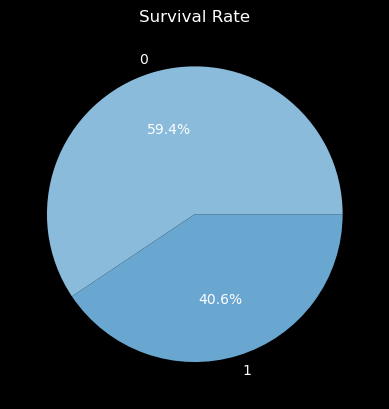

In [29]:

# Plot of Survival Rate
def plot_survival_rate(df):
    #Create a figure
    fig, ax = plt.subplots()

    # Plot the churn rate
    ax.pie(df['Survived'].value_counts(), labels=df['Survived'].value_counts().index, autopct='%1.1f%%')

    # Add a title
    ax.set_title('Survival Rate')

    # Show the plot
    plt.show()
plot_survival_rate(df)  

* This pie chart gives a visual representation of the survival rate among passengers in the dataset, highlighting the proportion of survivors and non-survivors 
* $59.4$ % of people did not survive while $40.6$ % percent survived.

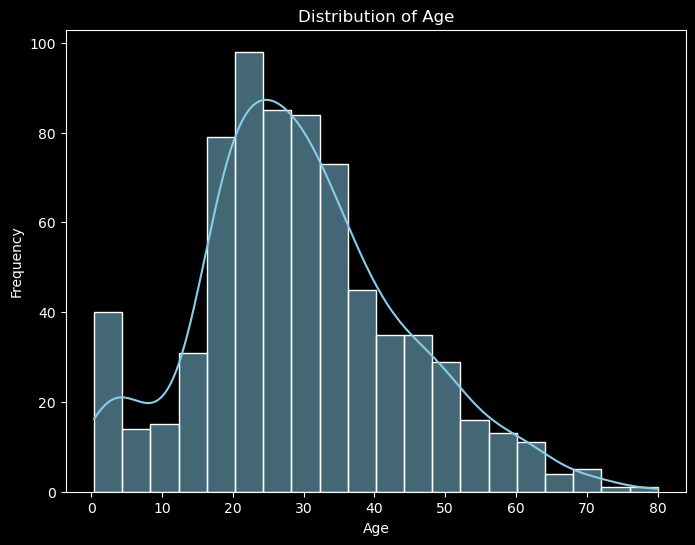

In [30]:
# Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

* The histogram provides valuable insights into the age distribution among passengers, with the majority falling within the $15$ to $35$ age range
* The histogram shows a peak in the age range between approximately $20$ and $25$ years. This suggests that a significant portion of passengers falls within this age group 
* The histogram's shape is somewhat right-skewed, indicating that there are more passengers in younger age groups compared 
to older age groups
* There is a relatively smaller number of children (around 5-15 years old) and elderly passengers (above 60 years old) on the Titanic


#### Passenger Class Distribution


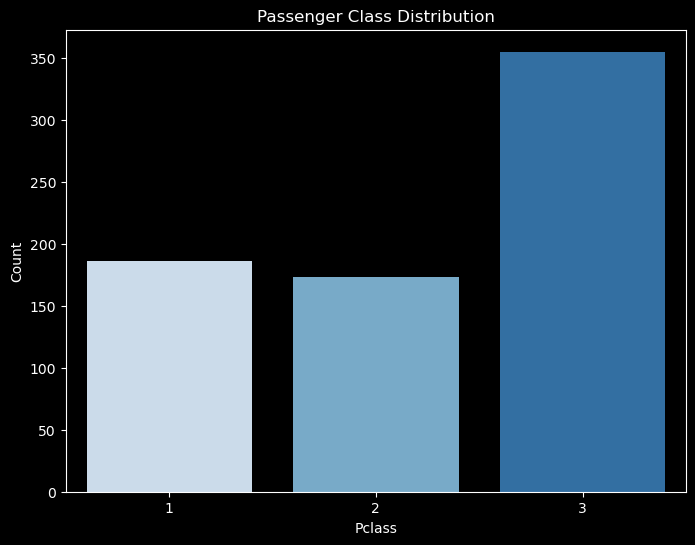

In [31]:
# Bar plot for Pclass
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', palette='Blues')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Passenger Class Distribution')
plt.show()

* The bar plot for passenger class (Pclass) displays the distribution of passengers across different classes  
* Class Distribution: Class 3 has the highest count, followed by Class 1, and then Class 2
* Class 3 has significantly more passengers than the other two classes, suggesting that it might be the most common class among the passengers.

### Bivariate Analysis  
Bivariate analysis involves exploring relationships between two variables


#### Age vs. Fare with Survival Hue

In [32]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [33]:
# Create scatter plot
fig = px.scatter(df, x='Age', y='Fare', color='Survived', title='Scatter Plot of Age vs. Fare')
fig.show()

* The scatter plot shows the distribution of passengers based on their age and fare paid for the ticket.

* There is no strong relationship between age and fare. The scattered distribution suggests that passengers of various ages paid different fares for their tickets

### survivors by Pclass


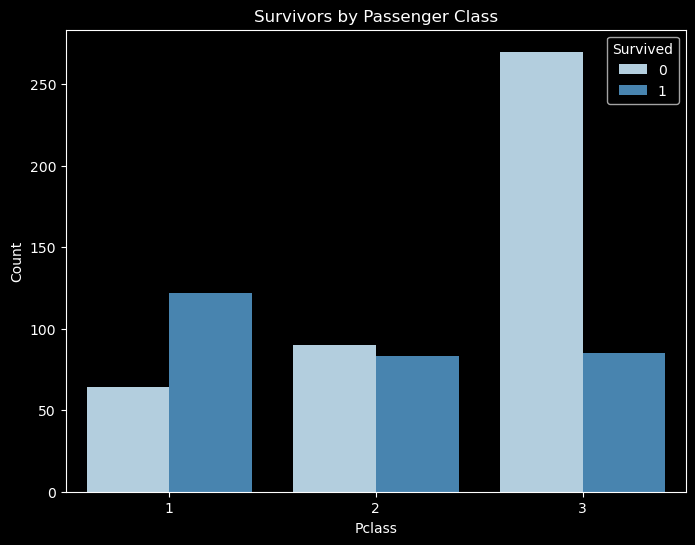

In [34]:
# Bar plot comparing the number of survivors by Pclass
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Blues')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survivors by Passenger Class')
plt.show()

* Class 1 (First Class): A larger number of passengers in first class survived compared to those who did not. This indicates a higher survival rate among first-class passengers
* Class 2 (Second Class): While there is a relatively close distribution, slightly more passengers in second class did not survive compared to those who survived. This suggests a lower survival rate in second class compared to first class
* Class 3 (Third Class): The bar plot shows a significant difference in the number of survivors between third class and non-survivors. Fewer passengers in third class survived, and a larger number did not survive, indicating a lower survival rate in third class
* Passengers in Class 1 had a higher chance of survival compared to those in Class 2 and Class 3. This suggests that the passenger class might have influenced the survival rate
* Class 3 had the highest number of passengers but the lowest survival rate, indicating a potential class-based hierarchy in rescue efforts

### Fare Distribution by Passenger Class

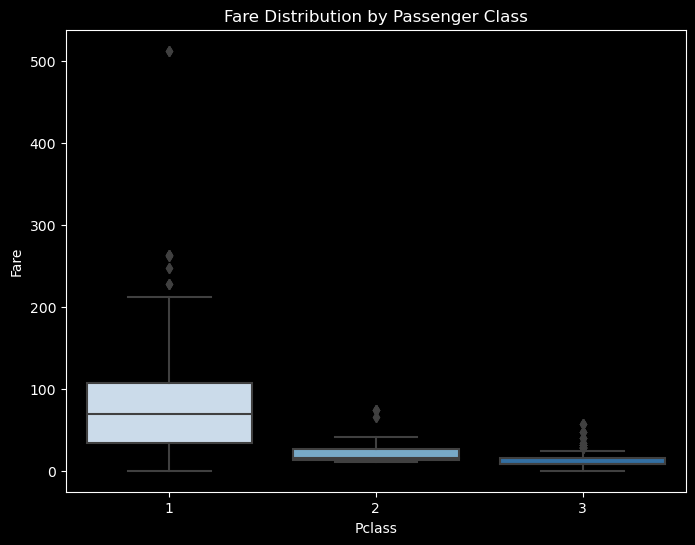

In [35]:
# Box plot comparing fares by passenger class
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Pclass', y='Fare', palette='Blues')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Fare Distribution by Passenger Class')
plt.show()


* Class 1 (First Class): The first-class passengers have the widest range of fares, with some paying significantly higher fares than others. There are a few outliers on the higher end, indicating that some first-class passengers paid exceptionally high fares.
* Class 2 (Second Class): Second-class fares have a narrower range compared to first-class, with generally lower fares. There are some outliers with relatively higher fares compared to the majority of second-class passengers.
* Class 3 (Third Class): Third-class fares have the narrowest range, and the majority of passengers paid lower fares. There are very few outliers on the higher end, suggesting that most third-class passengers paid lower fares
* This plot illustrates that first-class passengers paid a wide range of fares, including some very high fares. In contrast, second and third-class passengers generally paid lower fares, with fewer outliers indicating exceptionally high payments.

### Correlation heatmap between Age and Fare


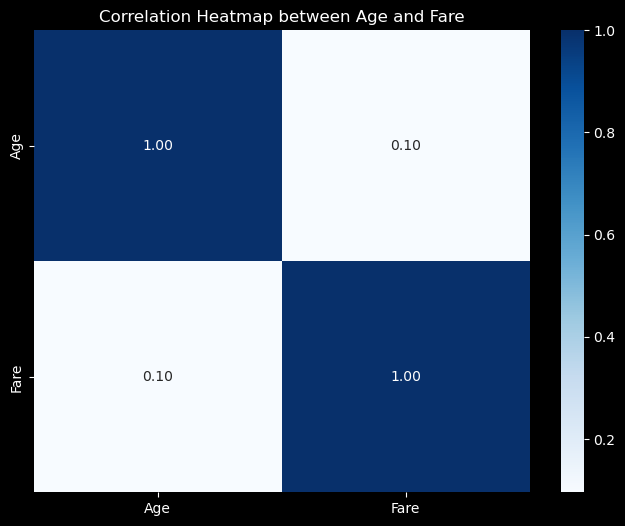

In [36]:
# Correlation heatmap between Age and Fare
correlation_matrix = df[['Age', 'Fare']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap between Age and Fare')
plt.show()

* Age vs. Fare (Age to Fare = 0.1):The correlation coefficient of 0.1 suggests a very weak positive linear relationship between a passenger's age and the fare they paid
* This implies that, on average, there is a slight tendency for older passengers to pay slightly higher fares, but the correlation is not strong enough to draw significant conclusions.

### Multivariate Analysis

Multivariate analysis involves the exploration and analysis of relationships between three or more variables simultaneously

#### Correlation Heatmap


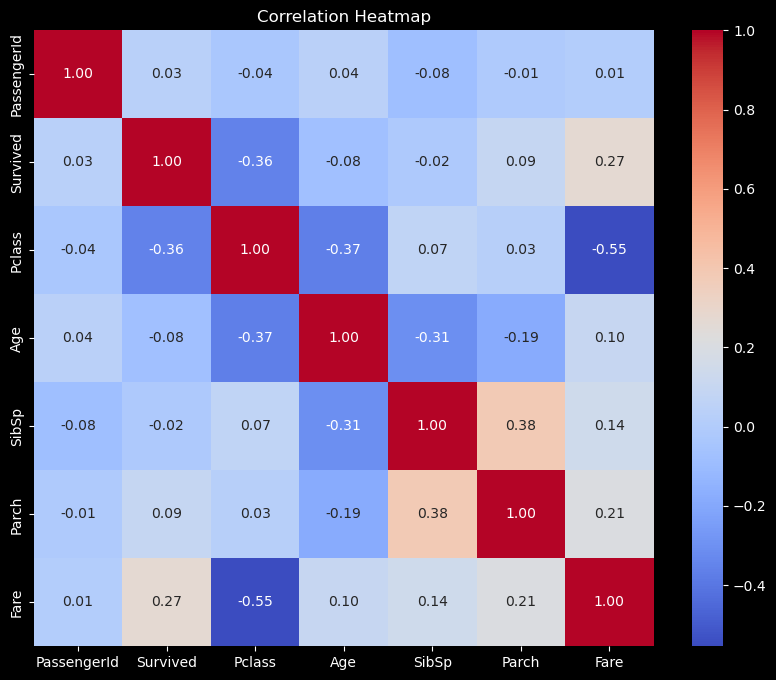

In [37]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

* Survived and Pclass: There is a noticeable negative correlation between "Survived" and "Pclass," indicating that passengers in higher classes (lower Pclass values) were more likely to survive.
* Survived and Fare: There is a positive correlation between "Survived" and "Fare," suggesting that passengers who paid higher fares had a higher chance of survival.
* Pclass and Fare: There is a negative correlation between "Pclass" and "Fare," which is expected since lower passenger classes typically paid lower fares.
* Age and Pclass: There is a negative correlation between "Age" and "Pclass," indicating that older passengers were more likely to be in higher classes.
* SibSp and Parch: There is a positive correlation between "SibSp" (number of siblings/spouses) and "Parch" (number of parents/children), suggesting that passengers with more siblings/spouses were more likely to have more parents/children aboard

### Pair Plot


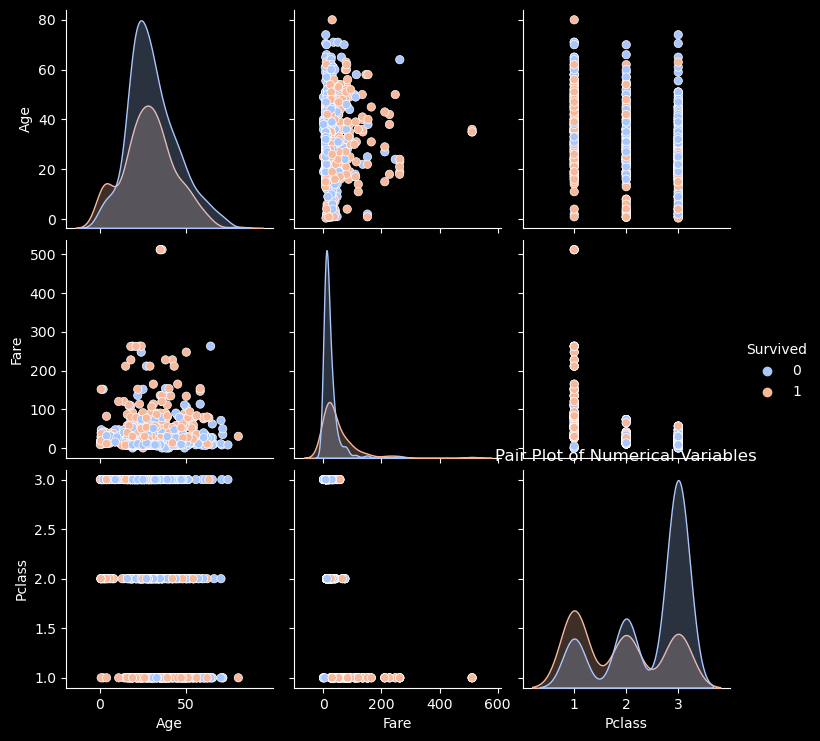

In [38]:
# Pair plot for numerical variables
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='coolwarm')
plt.title('Pair Plot of Numerical Variables')
plt.show()

* The pair plot generated provides a visual representation of the relationships between numerical variables in the dataset
* Age vs. Fare: The scatter plots between Age and Fare show a cluster of data points in the lower Fare range, including both non-survivors (blue) and survivors (orange). This suggests that Fare alone may not be a strong indicator of survival
* Fare vs. Pclass: The scatter plots between Fare and Pclass show that passengers in Pclass 1 (orange) paid significantly higher fares compared to those in Pclass 2 and 3 (blue). There is some overlap in fares between Pclass 2 and 3.
* Survived vs. Age: The histograms along the diagonal of the pair plot show the distribution of Age for survivors (orange) and non-survivors (blue). It appears that a higher proportion of younger passengers survived (orange), while older passengers have a more balanced distribution between survivors and non-survivors (blue)

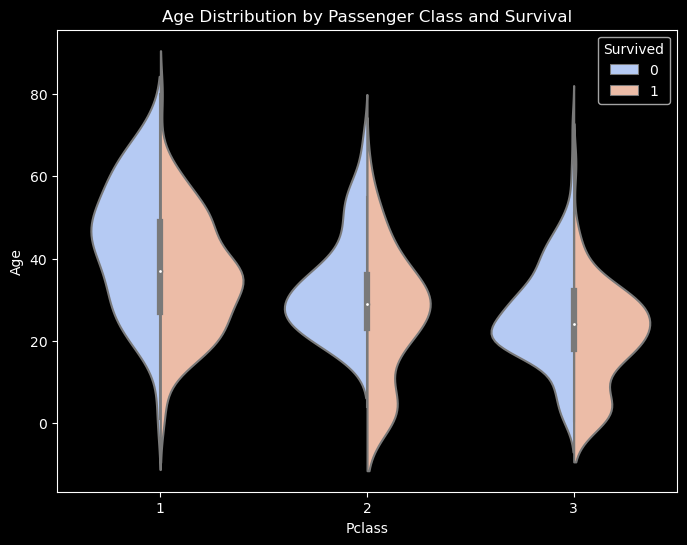

In [39]:
# Violin plot for Age distribution by passenger class
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', palette='coolwarm', split=True)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Age Distribution by Passenger Class and Survival')
plt.show()

* Violin Plot: A violin plot combines a box plot with a kernel density estimation to visualize the distribution of a numerical variable across different categories of a categorical variable
* This plot highlights that age played a more significant role in survival for passengers in Pclass 3, where younger passengers had a better chance of surviving. In Pclass 1 and 2, the impact of age on survival is less pronounced.

In [40]:
# Multivariate Parallel Coordinates Plot
fig = px.parallel_coordinates(df, dimensions=['Age', 'Fare', 'Pclass', 'Survived'], color='Survived')
fig.show()

* Plot above created using Plotly Express visualizes the relationships between the variables 'Age', 'Fare', 'Pclass', and 'Survived' while color-coding the lines based on the 'Survived' status (0 for non-survivors and 1 for survivors)
* Age vs. Fare: It appears that survivors and non-survivors have a wide range of ages and fares. However, there isn't a clear separation between the two groups based on these two variables alone.
* Pclass vs. Age: In general, passengers in Pclass 1 tend to be older, while those in Pclass 3 are younger. This aligns with the expectation that higher-class passengers were typically older and wealthier.
* Pclass vs. Fare: As expected, passengers in Pclass 1 paid higher fares on average compared to those in Pclass 2 and Pclass 3.
* Age vs. Survived: While the age distribution is similar for both survivors and non-survivors, there might be a slight concentration of younger survivors.